<a href="https://colab.research.google.com/github/Aromer9/deeplearning_study/blob/main/Lab_3_Generalizaci_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apredizaje y generalización

Keras también nos ayuda a entrenar redes que sean capaces de generalizar de manera muy  simple. En este laboratorio usaremos un conjunto de entrenamiento (train) y otro conjunto diferente de prueba o validación (test). La idea es que entrenaremos con uno y evaluaremos el desempeño de nuestra red en el otro.

También veremos cómo la regularización ayuda a mejorar la generalización.

In [1]:
# Importamos librerías necesarias

from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# Cargamos datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

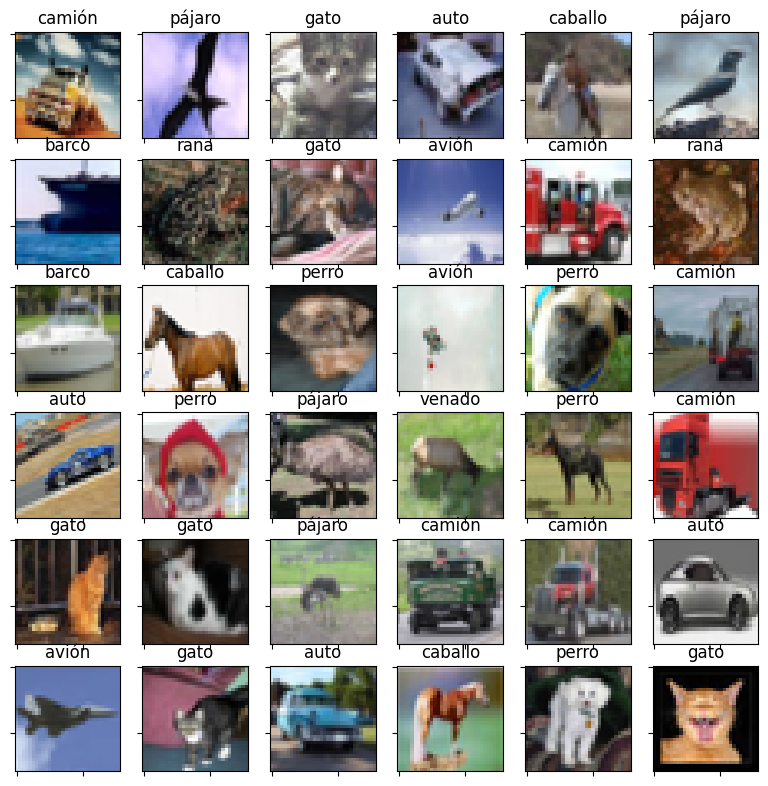

In [4]:
# Mostramos una grilla de ejemplos (al azar) del conjunto de test

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_test))
    axs[i,j].set_title(nombres[labs_test[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_test[ex])

In [5]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test
#reshape lleva las 3 dimensiones a 1 sola
X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [6]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

3072 10 50000 10000


In [7]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)


# Creamos nuestra red feed-forward (tiene 4 capas escondidas!)

h1 = 512
h2 = 256

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
hist = red.fit(X_train, Y_train,
        epochs=150,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

Epoch 1/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2345 - loss: 2.1220 - val_accuracy: 0.3509 - val_loss: 1.8521
Epoch 2/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3464 - loss: 1.8423 - val_accuracy: 0.3828 - val_loss: 1.7594
Epoch 3/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3759 - loss: 1.7643 - val_accuracy: 0.4033 - val_loss: 1.7015
Epoch 4/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3955 - loss: 1.7105 - val_accuracy: 0.4183 - val_loss: 1.6588
Epoch 5/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4124 - loss: 1.6684 - val_accuracy: 0.4291 - val_loss: 1.6250
Epoch 6/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4237 - loss: 1.6334 - val_accuracy: 0.4358 - val_loss: 1.5983
Epoch 7/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4342 - loss: 1.6028 - val_accuracy: 0.4463 - val_loss: 1.5762
Epoch 8/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4435 - loss: 1.5759 - val_acc

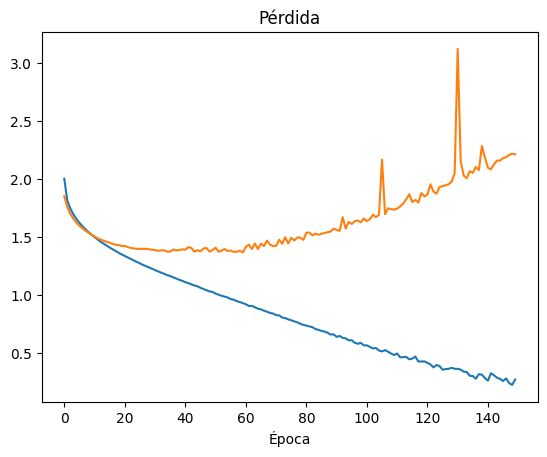

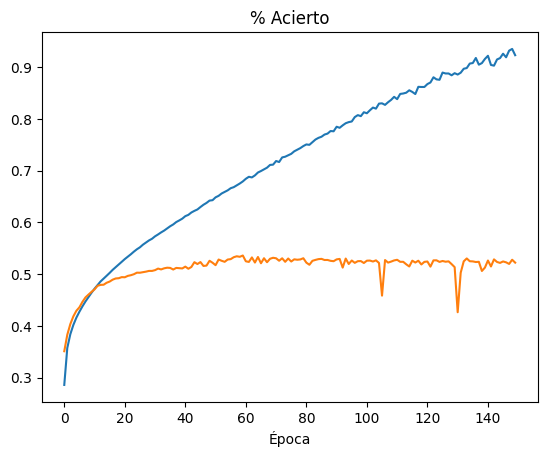

In [9]:
# Mostramos la pérdida y el acierto por cada época

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

## Ejercicio  1: Regularización por Dropout

Para agregar  Dropout en keras simplemente usamos la capa `keras.layers.Dropout(p)` donde `p` es la probabilidad de dropout (de apagar una  neurona). Para agregar una de  estas capas simplemente usamos `add` como cualquier otra. Por ejemplo, podríamos hacer esto:

```
red_reg = keras.Sequential()
red_reg.add(keras.layers.Dense(30, input_dim=100, activation='relu'))
red_reg.add(keras.layers.Dropout(0.2))
red_reg.add(keras.layers.Dense(20, activation='relu'))
...
```

Note que agregamos una capa de dropout entre la primera y la segunda capa.

Crea una nueva red `red_reg` haciendo lo siguiente:
- Agrega una capa de dropout entre cada una de  las capas escondidas de la red usando un dropout entre 0.2 y 0.5.
- Entrena la red por 150 épocas para que veas cómo cambia el aprendizaje.
- Guarda la historia del  entrenamiento en una variable `hist_reg` para luego poder graficarla junto a la historia del entrenamiento anterior.
- Imprime el historial de la pérdida y el acierto para este nuevo entrenamiento.
- Imprime el acierto del entrenamiento con y sin regularización en un mismo  gráfico.

¿Obtienes mejores resultados en cuanto al acierto?

### a)  Crea y entrena la  red

In [12]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

# Creamos nuestra red feed-forward

red_reg = keras.Sequential()

# Acá empieza tu código para crear red compilarla y entrenarla

red_reg = keras.Sequential()
red_reg.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
red_reg.add(keras.layers.Dropout(0.3))#8
red_reg.add(keras.layers.Dense(h2, activation='relu'))
red_reg.add(keras.layers.Dropout(0.5))#5
red_reg.add(keras.layers.Dense(h2, activation='relu'))
red_reg.add(keras.layers.Dense(C, activation='softmax'))

red_reg.summary()

#Esto se agregó ad
# antes de compilar creas el optimizador
#sgd_opt = keras.optimizers.SGD(lr=0.001)

red_reg.compile(
    loss='categorical_crossentropy',
    optimizer='sgd', #sgd_opt, #esto se cambia
    metrics=['accuracy']
)

# Acá termina tu código

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

### b) Imprime el historial de entrenamiento

In [13]:
# Acá empieza tu código para mostrar el historial del nuevo entrenamiento
hist_reg = red_reg.fit(X_train, Y_train,
        epochs=150,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

# Acá termina tu código

Epoch 1/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1673 - loss: 2.2444 - val_accuracy: 0.3099 - val_loss: 1.9586
Epoch 2/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2650 - loss: 2.0112 - val_accuracy: 0.3395 - val_loss: 1.8670
Epoch 3/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3056 - loss: 1.9253 - val_accuracy: 0.3634 - val_loss: 1.8076
Epoch 4/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3259 - loss: 1.8728 - val_accuracy: 0.3787 - val_loss: 1.7625
Epoch 5/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3428 - loss: 1.8334 - val_accuracy: 0.3879 - val_loss: 1.7315
Epoch 6/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3566 - loss: 1.8012 - val_accuracy: 0.3931 - val_loss: 1.7094
Epoch 7/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3646 - loss: 1.7784 - val_accuracy: 0.4087 - val_loss: 1.6758
Epoch 8/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3759 - loss: 1.7560 - val_acc

### c) Compara el historial con y sin regularización

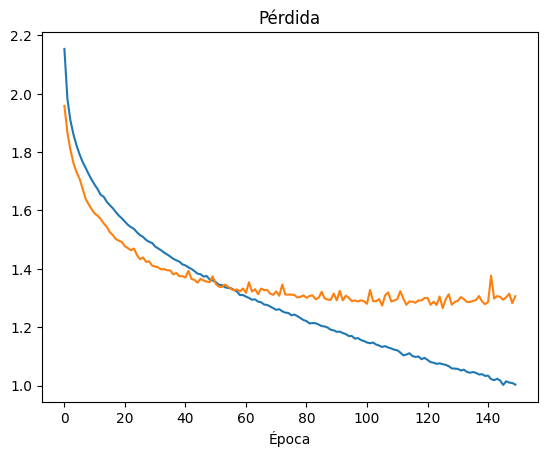

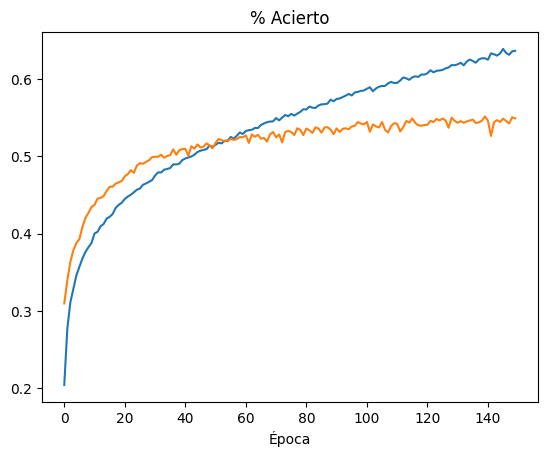

In [14]:
# Acá empieza tu código para la comparación del acierto
# con y sin regularización
plt.plot(hist_reg.history['loss'])
plt.plot(hist_reg.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(hist_reg.history['accuracy'])
plt.plot(hist_reg.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

# Acá termina tu código.

### d) Muestra una grilla con ejemplos y las predicciones de la red

In [ ]:
# Acá empieza tu código para mostrar una grilla con ejemplos
# y la predicción de la red.



# Acá termina tu código.

## Ejercicio 2 (Opcional): Mejora el acierto en el test set

Usa lo que  has aprendido de regularización para intentar mejorar el acierto en el test set. Puede intentar con un dropout más agresivo, cambiando el tamaño del batch (más pequeño puede mejorar pero demora la ejecución!), aumentando la capacidad de tu red, etc.

Otro cambio  que puedes hacer es cambiar la tasa de aprendizaje.  Para eso puedes usar las funcionalidades en `keras.optimizers`.  Por ejemplo, para usar SGD con una tasa de aprendizaje de `0.001` puedes usar un código como este:

```
# primero creas la red
red = keras.Sequential()
...

# antes de compilar creas el optimizador
sgd_opt = keras.optimizers.SGD(lr=0.001)

# al compilar usas el optimizador
red.compile(
    loss='categorical_crossentropy',
    optimizer=sgd_opt,
    metrics=['accuracy']
)

# ahora puedes entrenar como siempre
red.fit(...)
...

```

Incluso puedes hacer búsqueda de hiperparámetros para encontrar la mejor red respecto del acierto en el test set. Para esto puedes programar un loop en donde vas probando la red para distintos hiperparámetros. Si lo haces ordenado y estás dispuesto a esperar, puedes encontrar redes que mejoren sustancialmente las métricas.

In [ ]:
#pip install tensorflow-model-optimization
#!pip install numpy

In [15]:
#RESP Ejercicio 2
from tensorflow.keras.optimizers import SGD

np.random.seed(30)
tf.random.set_seed(30)

# Creamos nuestra red feed-forward

red_reg_2 = keras.Sequential()

# Acá empieza tu código para crear red compilarla y entrenarla

red_reg_2 = keras.Sequential()
red_reg_2.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
red_reg_2.add(keras.layers.Dropout(0.3))#8
red_reg_2.add(keras.layers.Dense(h2, activation='relu'))
red_reg_2.add(keras.layers.Dropout(0.5))#5
red_reg_2.add(keras.layers.Dense(h2, activation='relu'))
red_reg_2.add(keras.layers.Dense(C, activation='softmax'))

red_reg_2.summary()

#Esto se agregó ad
# antes de compilar creas el optimizador
sgd_opt = keras.optimizers.SGD(learning_rate=0.001)

red_reg_2.compile(
    loss='categorical_crossentropy',
    optimizer=sgd_opt, #sgd_opt, #esto se cambia
    metrics=['accuracy']
)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hist_reg_2 = red_reg_2.fit(X_train, Y_train,
        epochs=150,
        batch_size=50,#128
        validation_data=(X_test,Y_test)
       )

Epoch 1/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1208 - loss: 2.3492 - val_accuracy: 0.2441 - val_loss: 2.1840
Epoch 2/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1858 - loss: 2.2123 - val_accuracy: 0.2693 - val_loss: 2.0797
Epoch 3/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2161 - loss: 2.1356 - val_accuracy: 0.2956 - val_loss: 2.0032
Epoch 4/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2447 - loss: 2.0705 - val_accuracy: 0.3125 - val_loss: 1.9508
Epoch 5/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2610 - loss: 2.0266 - val_accuracy: 0.3251 - val_loss: 1.9118
Epoch 6/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2764 - loss: 1.9921 - val_accuracy: 0.3367 - val_loss: 1.8841
Epoch 7/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2856 - loss: 1.9661 - val_accuracy: 0.3421 - val_loss: 1.8644
Epoch 8/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2973 - loss: 1

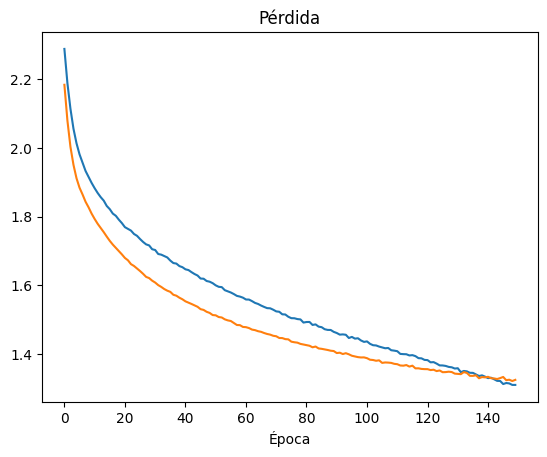

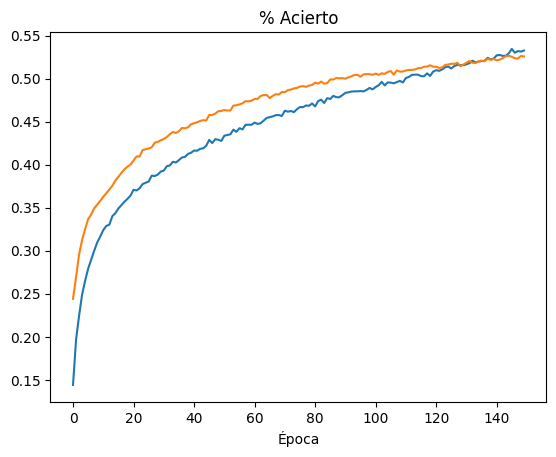

In [17]:
# Acá empieza tu código para la comparación del acierto
# con y sin regularización
plt.plot(hist_reg_2.history['loss'])
plt.plot(hist_reg_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(hist_reg_2.history['accuracy'])
plt.plot(hist_reg_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

# Acá termina tu código.